In [67]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
names_TAMER = ["gian_marco", "gian_marco2", "gian_marco3", "gian_marco4", "gian_marco5", "gian_marco6", "gian_marco7", "gian_marco8", "gian_marco9", "gian_marco10"]
names_retro_TAMER_multiple = ["gian_marco", "gian_marco2", "andrew_wang_1"]
names_retro_TAMER_single = ["andrew_wang_2","gian_marco", "gian_marco2", "gian_marco3", "gian_marco4"]

In [69]:
name = "results/Retro_TAMER_single_andrew_wang_1.csv"
df = pd.read_csv(name)

x = np.linspace(1, df["Timesteps"].shape[0] + 1, df["Timesteps"].shape[0], dtype=int)
plt.plot(x, df["Timesteps"])
plt.plot(x, df["Feedbacks"]*50)
plt.title("Retro-TAMER, single feedback")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()
print("At peak: %d timesteps" % (np.array(df["Timesteps"])[-1]))
print("Second episode: %d timesteps" % (np.array(df["Timesteps"])[1]))
print("Third episode: %d timesteps" % (np.array(df["Timesteps"])[2]))

FileNotFoundError: File b'results/Retro_TAMER_single_andrew_wang_1.csv' does not exist

In [70]:
def collect_data(filepath, names):
    data = {"Peak": [], "Episodes for Peak": [], "Timesteps at Peak": [], "Second Episode": [], "Third Episode": [],  "Fs 2nd episode": []}
    for name in names:
        df = pd.read_csv(filepath + "_" + name + ".csv")
        data["Peak"].append(np.array(df["Timesteps"])[-1])
        data["Second Episode"].append(np.array(df["Timesteps"])[1])
        try:
            data["Third Episode"].append(np.array(df["Timesteps"])[2])
        except:
            data["Third Episode"].append(0)
        data["Episodes for Peak"].append(int(df["Timesteps"].shape[0]))
        data["Fs 2nd episode"].append(np.array(df["Feedbacks"])[1])
        data["Timesteps at Peak"].append(np.array(df.iloc[-1]["Timesteps"]))
    return pd.DataFrame(data)

# Average, std. dev, histogram
def hist_ep_to_peak_ts_at_peak(filepath, names, ep_bins=10, ts_bins=10):
    # Histogram of number of episodes to "peak":
    episodes_to_peak = []
    # Histogram of number of time steps at "peak":
    timesteps_at_peak = []
    for name in names:
        df = pd.read_csv(filepath + "_" + name + ".csv")
        # Assumes training stopped as soon as peak reached
        episodes_to_peak.append(len(df.values))
        timesteps_at_peak.append(df.iloc[-1]['Timesteps'])
    
    plt.hist(episodes_to_peak, bins=10)
    plt.show()
    plt.hist(timesteps_at_peak, bins=10)
    plt.show()
        
    return episodes_to_peak.mean(), timesteps_at_peak.mean()

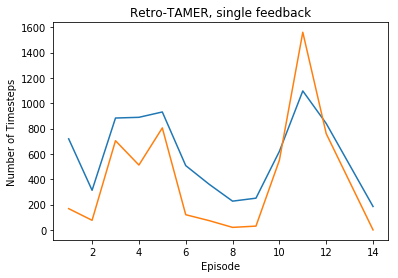

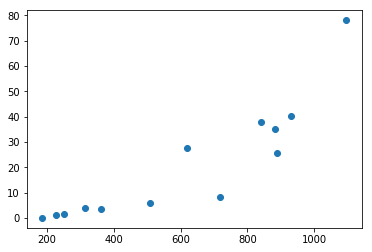

In [77]:
filepath = "results/Retro_TAMER_single" 
names = names_retro_TAMER_single

dfs = []
max_timesteps = 0
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    dfs.append(df)
    max_timesteps = max(max_timesteps, df["Timesteps"].shape[0])

timesteps_R_TAMER_s = np.zeros(max_timesteps)
to_average = np.zeros(max_timesteps)
feedbacks = np.zeros(max_timesteps)
for df in dfs:
    for i in range(df["Timesteps"].shape[0]):
        timesteps_R_TAMER_s[i] += np.array(df["Timesteps"])[i]
        feedbacks[i] += np.array(df["Feedbacks"])[i]
        to_average[i] += 1

for i in range(max_timesteps):
    timesteps_R_TAMER_s[i] = float(timesteps_R_TAMER_s[i])/float(to_average[i]) 
    feedbacks[i] = float(feedbacks[i])/float(to_average[i])
    
x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_R_TAMER_s)
plt.plot(x, feedbacks*20)
plt.title("Retro-TAMER, single feedback")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()

plt.scatter(timesteps_R_TAMER_s, feedbacks)
#plt.show()

[10, 13, 8, 4, 6]
[131, 185, 179, 135, 197]


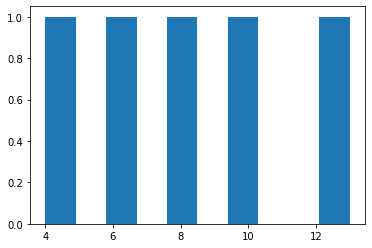

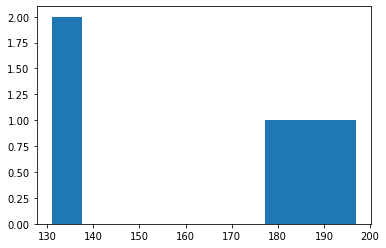

In [22]:
filepath = "results/Retro_TAMER_single" 
names = names_retro_TAMER_single

# Histogram of number of episodes to "peak":
episodes_to_peak = []
# Histogram of number of time steps at "peak":
timesteps_at_peak = []
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    episodes_to_peak.append(len(df.values))
    timesteps_at_peak.append(df.iloc[-1]['Timesteps'])
    
print(episodes_to_peak)
print(timesteps_at_peak)

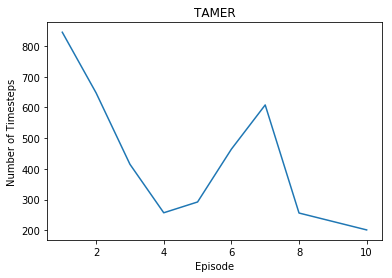

In [78]:
filepath = "results/TAMER" 
names = names_TAMER

dfs = []
max_timesteps = 0
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    dfs.append(df)
    max_timesteps = max(max_timesteps, df["Timesteps"].shape[0])

timesteps_TAMER = np.zeros(max_timesteps)
to_average = np.zeros(max_timesteps)
for df in dfs:
    for i in range(df["Timesteps"].shape[0]):
        timesteps_TAMER[i] += np.array(df["Timesteps"])[i]
        feedbacks[i] += np.array(df["Feedbacks"])[i]
        to_average[i] += 1

for i in range(max_timesteps):
    timesteps_TAMER[i] = float(timesteps_TAMER[i])/float(to_average[i])      
    
x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_TAMER)
# plt.plot(x, feedbacks*20)
plt.title("TAMER")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()

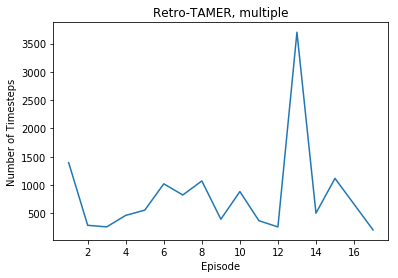

In [79]:
filepath = "results/Retro_TAMER_multiple" 
names = names_retro_TAMER_multiple

dfs = []
max_timesteps = 0
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    dfs.append(df)
    max_timesteps = max(max_timesteps, df["Timesteps"].shape[0])

timesteps_R_TAMER_m = np.zeros(max_timesteps)
to_average = np.zeros(max_timesteps)
for df in dfs:
    for i in range(df["Timesteps"].shape[0]):
        timesteps_R_TAMER_m[i] += np.array(df["Timesteps"])[i]
        to_average[i] += 1
        
for i in range(max_timesteps):
    timesteps_R_TAMER_m[i] = float(timesteps_R_TAMER_m[i])/float(to_average[i])      
    
x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_R_TAMER_m)
# plt.plot(x, df["Feedbacks"]*50)
plt.title("Retro-TAMER, multiple")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()

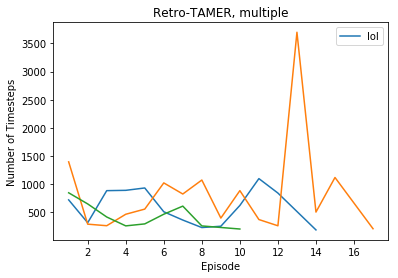

In [80]:
max_timesteps = 17
# if i in range(max_timesteps):
#     if timesteps_R_TAMER_s.shape[0] < max_timesteps:
#         timesteps_R_TAMER_s = list(timesteps_R_TAMER_s)
#         print(timesteps_R_TAMER_s)
#         timesteps_R_TAMER_s = np.array(timesteps_R_TAMER_s.append(0.0))
#         print(timesteps_R_TAMER_s)
#     if timesteps_R_TAMER_m.shape[0] < max_timesteps:
#         timesteps_R_TAMER_m = list(timesteps_R_TAMER_m)
#         timesteps_R_TAMER_m = np.array(timesteps_R_TAMER_m.append(0.0))
#     if timesteps_TAMER.shape[0] < max_timesteps:
#         timesteps_TAMER = list(timesteps_TAMER)
#         timesteps_TAMER = np.array(timesteps_TAMER.append(0.0))

x = np.linspace(1, timesteps_R_TAMER_s.shape[0] + 1, timesteps_R_TAMER_s.shape[0], dtype=int)
plt.plot(x, timesteps_R_TAMER_s, label="lol")
x = np.linspace(1, timesteps_R_TAMER_m.shape[0] + 1, timesteps_R_TAMER_m.shape[0], dtype=int)
plt.plot(x, timesteps_R_TAMER_m)
x = np.linspace(1, timesteps_TAMER.shape[0] + 1, timesteps_TAMER.shape[0], dtype=int)
plt.plot(x, timesteps_TAMER)
plt.title("Retro-TAMER, multiple")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.legend()
plt.show()

In [29]:
print(collect_data("results/TAMER", names_TAMER))

   Peak  Episodes for Peak  Second Episode  Third Episode  Fs 2nd episode  \
0   187                  5            1246            588              11   
1   201                  9            1260            363              13   
2   184                  3             248            184               2   
3   127                  4             389            328               4   
4   187                  2             187              0               0   
5   258                  4            1000            401               8   
6   183                  2             183              0               0   
7   198                  6            1009           1013               9   
8   197                  4             692            274               7   
9   168                  3             258            168               1   

  Timesteps at Peak  
0               187  
1               201  
2               184  
3               127  
4               187  
5               258 

In [30]:
print(collect_data("results/Retro_TAMER_multiple", names_retro_TAMER_multiple))

   Peak  Episodes for Peak  Second Episode  Third Episode  Fs 2nd episode  \
0   184                 12             297            253               1   
1   196                 11             235            336               3   
2   206                 16             330            190               2   

  Timesteps at Peak  
0               184  
1               196  
2               206  


In [31]:
print(collect_data("results/Retro_TAMER_single", names_retro_TAMER_single))

   Peak  Episodes for Peak  Second Episode  Third Episode  Fs 2nd episode  \
0   131                 10             260            175               1   
1   185                 13             471           1900               6   
2   179                  8             327           1704               8   
3   135                  4             253            228               2   
4   197                  6             253            408               2   

  Timesteps at Peak  
0               131  
1               185  
2               179  
3               135  
4               197  


In [ ]:
name = "results/Retro_TAMER_multiple_Andrew_cervantes.csv"
df = pd.read_csv(name)
print(df)

name = "results/TAMER_james_cameron.csv"
df = pd.read_csv(name)
print(df)